## Multi-class Classification and Neural Networks

In this exercise, you will implement one-vs-all logistic regression and neural
networks to recognize hand-written digits.

*Note:
There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.*

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special,scipy.io
from scipy.optimize import minimize
import matplotlib.cm as cm
import scipy.misc
import random
%matplotlib inline

Data = scipy.io.loadmat('./Files/ex3data1.mat') #This a dictionary

print(Data.keys())

X = Data['X'] #Here each row represents the grayscale value of an image
Y = Data['y'] #Labels

print("X shape is",X.shape)
print("Y shape is",Y.shape)

#Adding the bias unit
X = np.insert(X,0,1,axis=1)

print("New X shape is",X.shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X shape is (5000, 400)
Y shape is (5000, 1)
New X shape is (5000, 401)


### Visualizing the data:

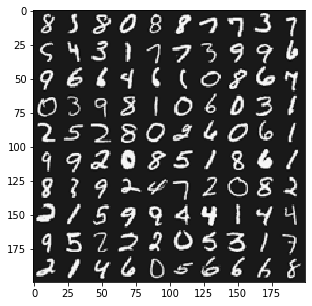

In [6]:
# This code is Inspired by David Kaleko:
Index = random.sample(range(X.shape[0]),100)

def Convert_20x20(x):
    """
    Function that is handed a single np array with shape 1x400,
    crates a 20x20 image object from it, and returns it
    """
    width,height = 20,20 #The dimensions of the image
    img = x.reshape(width,height).T
    return img
def Display_Grid(indices_to_display):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width,height = 20,20 #The dimensions of the image
    nrows,ncols = 10,10 #The dimensions of the Image grid
    Grid = np.zeros((nrows*20,ncols*20)) #Each image is 20x20 therefor the Grid dimension is 200x200
    
    
    irow,icol = 0,0 #Index of the images in the Grid
    for index in indices_to_display:
        if(icol==ncols): #Here we are filling the Grid with images row wise 
            irow +=1
            icol  =0
        img = Convert_20x20(X[index,1:])
        Grid[irow*height:irow*height+20,icol*width:icol*width+20] = img
        icol +=1
    
    fig = plt.figure(figsize=(5,5))
    plt.imshow(Grid,cmap = cm.Greys_r)
    
    
    
Display_Grid(Index)